# Chapter 3 - Bassic Math and Statistics
## Seg 5 - Starting with parametric methods in pandas and scipy

1. To find correlation between categorical,non-linearly related,non-normally distributed variables.
2. 담배 습관에 대한 분석을 가정하자. 
    - Spearman's rank correlation
        - Finds the R corrleation between variable-pairs of ordinal data types. Variable-pairs are then able to be ranked according to the strength of the correlation between them.
        - an ordinal variable is a numeric variable that's able to be categorized.
        - Test population for a correlation between income as a bracket,and cigarette consumption of smokers.
    - Chi-square tables : correlation between categorical variables.
        - 고소득자 담배 소비량 > 저소득자 담배 소비량

![title](./picture/lynda_python_data_analysis/spearman_rank_correlation.png)

### Spearman's Rank Assumptions
- Your variables are ordinal (in other words,numeric,but able to be ranked like a categorical variable).
- Your variables are related nonlinearly.
- Your data is non-normally distributed.

### Chi-Square Tables Test for Independence
- p < 0.05 --> Reject null hypothesis and conclude that the variables are correlated.
- p > 0.05 --> Accept null hypothesis and conclude that the variables are independent.

![title](./picture/lynda_python_data_analysis/things_to_consider_chisquare.png)

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats.stats import spearmanr

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 14,7
plt.style.use('seaborn-whitegrid')

### The Spearman Rank Correlation

In [4]:
address = './mtcars.csv'
cars = pd.read_csv(address)
cars.columns=['car_names','mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


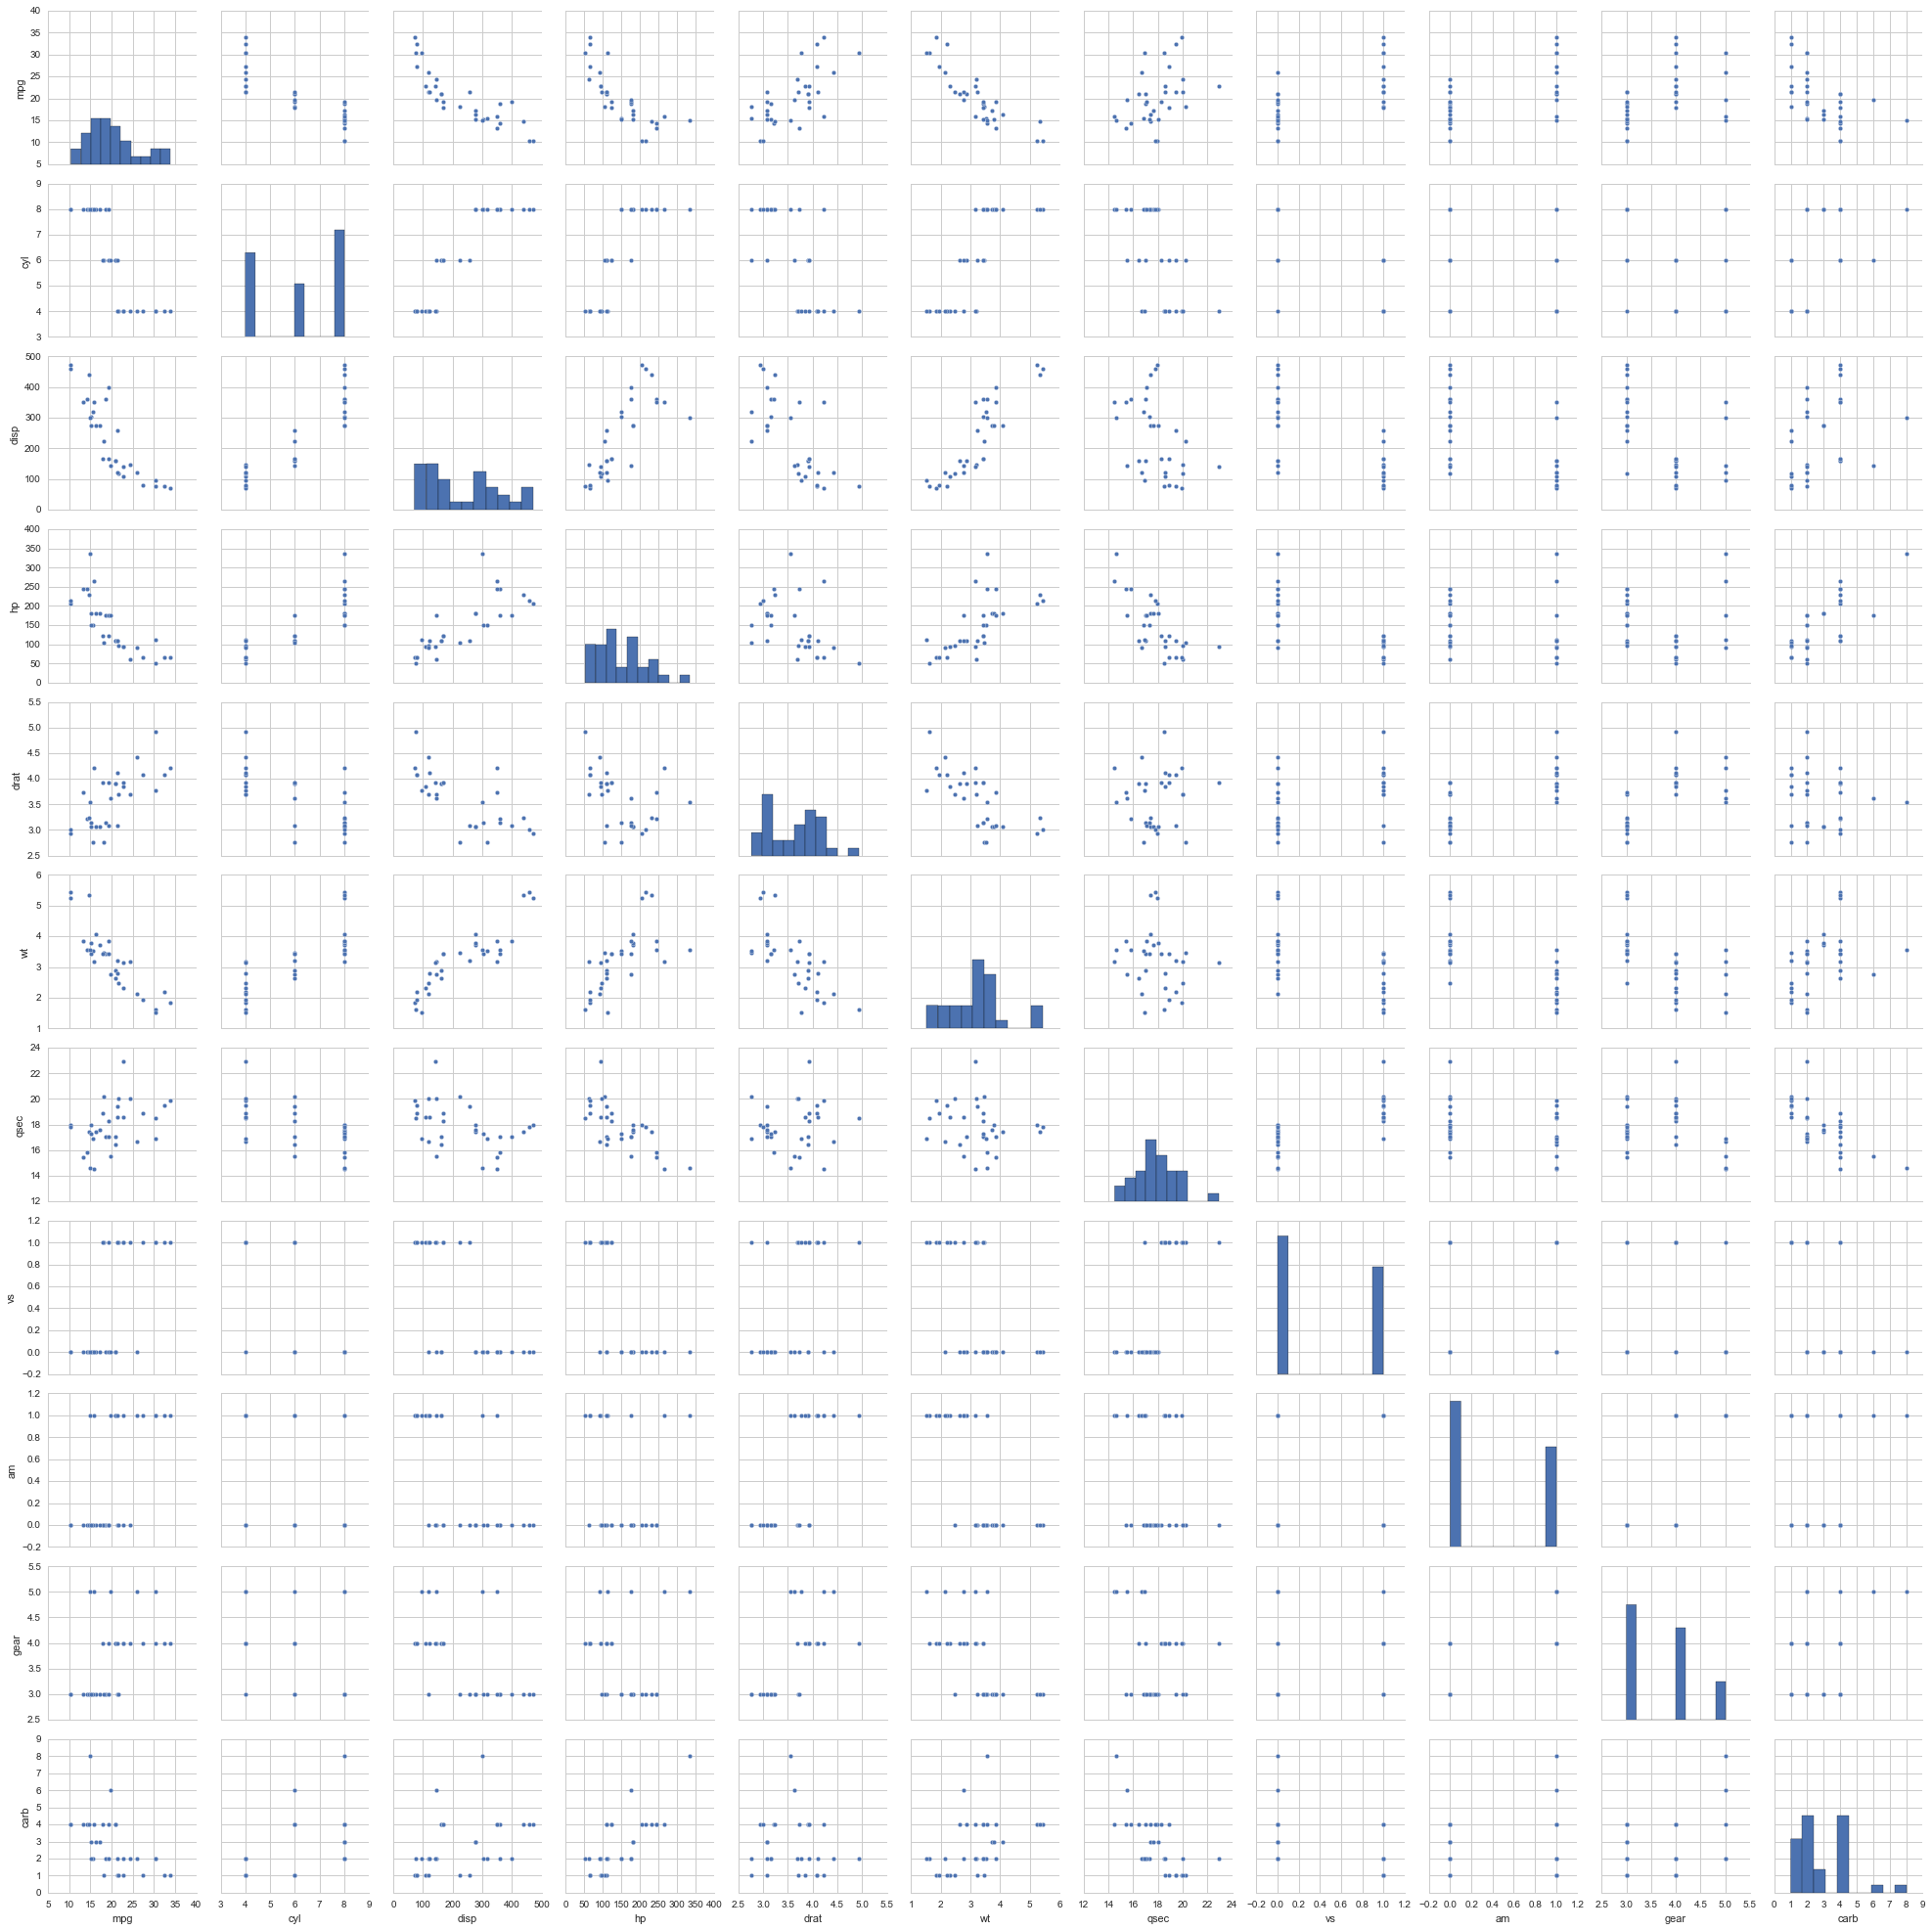

In [5]:
sb.pairplot(cars)

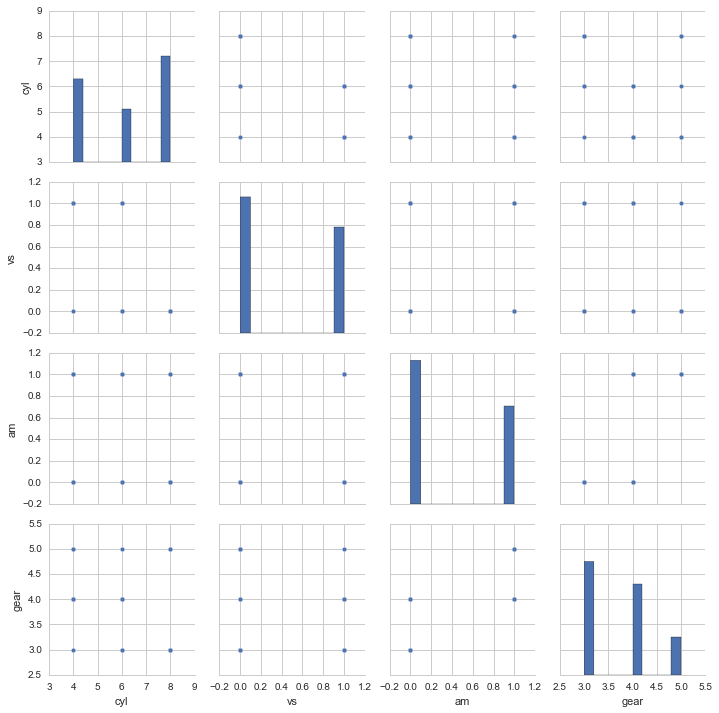

In [6]:
# ordinal value 선택
x = cars[['cyl','vs','am','gear']]
sb.pairplot(x)

In [8]:
cyl = cars['cyl']
vs = cars['vs']
am = cars['am']
gear = cars['gear']
spearmanr_coefficient, p_value = spearmanr(cyl,vs)
print('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.814


In [9]:
spearmanr_coefficient, p_value = spearmanr(cyl,am)
print('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.522


In [10]:
spearmanr_coefficient, p_value = spearmanr(cyl,gear)
print('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.564


### Chi-square test for independence

In [11]:
table = pd.crosstab(cyl,am)

from scipy.stats import chi2_contingency
chi2,p,dof,expected = chi2_contingency(table.values)

print('Chi-square statistic %0.3f p_value %0.3f' % (chi2,p))

Chi-square statistic 8.741 p_value 0.013
